##Lets write the code!

###Airline Data Analysis

We have a dataset which has monthly analysis of number of people who travelled internationally.

We need to predict the number of people who might travel in the upcoming month. Keeping in mind the seasonal trends, we shall keep our window of 𝑋
 to be of 12 months.

We need to keep in mind that 𝑌𝑡
 will also become part of 𝑋𝑡+1
 for calculation of 𝑌𝑡+1
###Preparing the Data

We will prepare the testing and training data like we dicussed in the analysis.

In [1]:
from pandas import read_csv
import numpy as np

In [2]:
df = read_csv('https://files.codingninjas.in/international-airline-passengers-7703.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
df.head(10)


,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [10]:
values = df.values.astype('float32')
print(values[:10])
values.shape


[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]]


(144, 1)

In [11]:
train_size = int((values.shape[0])*0.67)
test_size  = values.shape[0] - train_size
train = values[:train_size]
test = values[train_size :]

In [34]:
test.shape ,train.shape

((48, 1), (96, 1))

In [13]:
train[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

The above code snippet you provided is using the MinMaxScaler from the sklearn.preprocessing module in Python. This scaler is being used to normalize the train and test data using the Min-Max scaling technique, which scales the data to a specified range (in this case, between 0 and 1).

Here's how the code works:

MinMaxScaler is imported from sklearn.preprocessing.

An instance of MinMaxScaler is created with the specified feature range of (0,1), which indicates that the data will be scaled to the range of 0 to 1.

train data is then transformed using the fit_transform() method of MinMaxScaler, which calculates the scaling parameters (minimum and maximum values) based on the train data and scales it accordingly.

test data is transformed using the transform() method of MinMaxScaler, which applies the same scaling parameters calculated from the train data to scale the test data. This ensures that the test data is scaled consistently with the train data.

After this code snippet is executed, the train and test data will be normalized to the range of 0 to 1, which can be beneficial for certain machine learning algorithms that are sensitive to the scale of input features.

In [16]:
train[:10] # we can notice the change in the value of the training data

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619],
       [0.10032365],
       [0.14239484],
       [0.14239484],
       [0.10355988],
       [0.04854369]], dtype=float32)

In [30]:
def create_dataset(data,k):
    dataX ,dataY = [],[]
    for i in range(data.shape[0] -k): # i have data.shape - k data points 
        x = data[i:i+k,0] # take from i to i+k and predict next one 
        # data[i:i+k,0] means from i to i+k rows and 0 th column 
        y = data[i+k,0] # when i to i+k is taken to predict i+k th term do y will be only one value
        # so the shape of y is just 1 row that is i+k th row there select 0 th column
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)
    

In [40]:
look_back = 12
trainX ,trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [41]:
print(trainX.shape,trainY.shape,testX.shape,testY.shape) #before reshaping

(84, 12) (84,) (36, 12) (36,)


In [42]:
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1)) 
# reshape happens like the below
# [number of data points ,length of sequence , number of featurs in one entry of sequence ]
# so np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1)) 
# here
# number of data points = trainX.shape[0]
# length of sequence = trainX.shape[1]
# number of featurs in one entry of sequence = 1 here we have only one feature in each element of sequence

testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
print(trainX.shape,testX.shape)

(84, 12, 1) (36, 12, 1)


In [43]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [44]:
model = Sequential()
model.add(SimpleRNN(4,input_shape = (look_back ,1)))
model.add(Dense(64,activation= 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs= 10,batch_size= 1)

Epoch 1/10
84/84 [==============================] - 5s 4ms/step - loss: 0.0692
Epoch 2/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 3/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 4/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 5/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 6/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 8/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 10/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0060


In [45]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape,testTrue.shape

3/3 [==============================] - 0s 5ms/step


((36,), (36,))

In [46]:
from matplotlib import pyplot as plt

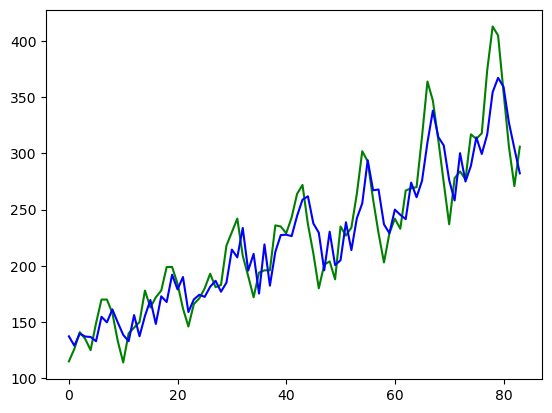

In [47]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

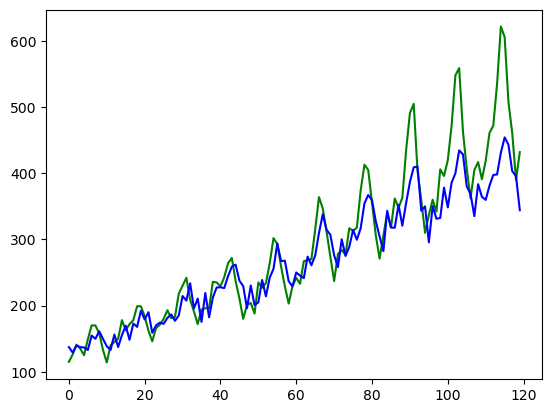

In [49]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [50]:
from sklearn.metrics import r2_score
r2_score(combinedTrue, combinedPredicted)

0.8459869023546812